<a href="https://colab.research.google.com/github/nattzza/AutoML-Data-Challenge/blob/main/KaggleDataChallenge_Nat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Challenge - 

In [ ]:
#!pip install pycaret

In [ ]:
#!pip install interpret

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Load Data

In [10]:
google_drive_path = "/content/drive/MyDrive/ML Challenge Data/"
X_train_name = "features_train.csv"
y_train_name = "target_train.csv"
X_test_name = "features_test.csv"

In [11]:
y_train = pd.read_csv(google_drive_path + y_train_name, index_col="Id").reset_index(drop=True)
print(y_train.shape)
y_train.head()

(10000, 1)


,Expected
0,0
1,0
2,2
3,1
4,2


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
X_train = pd.read_csv(google_drive_path + X_train_name, index_col="Id").reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,1.997513,2.280097,5.906375,0.150651,-5.641568,12.399412,5.011646,1.852362,0.475867,0.510913,-1.015441,0.199764,1.490854,0.076575,-4.479576,1.903053,0.452382,0.481742,1.259534,0.030284,5.292789,0.118012,1.522969,1.307279,23.808472,0.889536,-2.184300,-3.434408,-0.187053,-0.315984,...,0.072776,1.750517,1.121535,0.644969,-4.458461,16.767320,-0.315395,1.871807,2.163873,0.144154,0.641523,-1.486565,0.031982,0.894450,0.913196,0.046830,-1.276655,0.771211,2.038736,1.990629,0.004606,0.503038,0.622240,1.049451,0.000136,-22.219764,-0.058046,1.166972,-1.117488,0.989951,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,4.598360,-5.775092,-6.516740,1.003522,13.381746,-3.584999,0.416845,2.924790,0.073121,-1.377308,-2.875074,0.554860,0.358751,3.775412,0.764284,1.068030,0.003890,0.037002,0.456791,1.161268,2.548486,0.083868,0.424432,4.847485,5.738793,-0.556860,-12.565164,4.490605,-0.204060,0.249571,...,0.782956,1.240777,2.092866,2.298090,-12.537208,-5.961822,-1.230639,7.049593,0.258340,2.231772,0.895187,-1.304038,0.007809,-15.059307,1.114274,0.533213,-0.011918,0.934703,0.413158,1.939804,0.699954,0.190458,0.406481,-1.817962,0.252635,10.887651,2.367816,-11.312185,0.416286,0.477416,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,1.368589,-5.828967,14.266635,0.124223,13.647478,12.043413,0.221695,0.903116,0.803960,-0.132633,4.494041,0.982299,0.196872,0.001297,0.950084,0.854328,0.013964,0.410431,0.045722,0.346083,9.463682,0.034303,0.785419,0.886565,19.629010,0.698729,6.481368,-3.971667,-0.667759,-0.154754,...,0.260203,0.822976,0.432365,0.721396,-8.987762,-7.022517,6.344787,0.136055,0.929645,0.933891,1.975385,-0.773477,3.272705,4.053084,3.771948,0.105972,0.693894,0.246871,3.701254,0.547627,0.017933,0.937699,0.137430,0.516001,0.036088,-5.912876,0.240362,4.619169,-0.910393,9.600796,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,8.165835,-4.796236,4.220389,0.011627,1.968096,1.924126,0.345798,0.125466,2.634259,0.296963,2.786869,0.294387,4.759162,0.327186,-1.805663,2.029318,0.072633,0.013685,0.162798,0.165759,-16.324343,0.296098,0.187905,1.430911,25.526839,0.340931,7.610446,-6.897755,0.622711,-0.833872,...,0.769423,0.565071,0.360012,0.526670,13.163752,-1.731318,-2.016885,10.358130,0.636688,0.212999,-1.715203,-1.279456,2.302670,-7.893884,0.440732,0.681664,-0.363657,0.873688,5.892810,0.815144,3.744437,2.923058,4.504636,-1.720670,1.750316,14.558369,1.496706,-0.247011,0.099182,1.205843,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,2.686701,-6.056380,0.848508,0.990852,3.383298,-6.570478,0.648400,0.758079,0.835232,-0.585741,-4.401633,0.783268,0.049123,0.495727,0.228554,1.564695,0.584950,0.845195,0.513798,0.030185,0.296172,0.266663,0.307711,0.533678,5.240953,-0.338997,-2.797768,6.709862,-1.158840,0.735793,...,0.774417,4.527023,1.369383,0.893969,10.783789,4.286830,3.523166,60.634258,0.497629,0.205183,-0.608828,0.085580,0.296885,1.956517,0.000006,1.732382,2.153492,0.245138,2.157437,1.508039,0.712625,0.104814,0.882323,-0.903271,1.233372,4.658989,0.744118,-9.740877,1.089912,0.456917,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [13]:
X_test = pd.read_csv(google_drive_path + X_test_name, index_col="Id")
print(X_test.shape)
X_test.head()

(20000, 120)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,0.611603,2.218305,-5.475461,7.092829,1.094443,-2.538781,-6.729620,0.237795,1.206781,1.422760,-0.180612,1.396366,0.979488,1.434289,3.406323,-0.885763,0.716380,2.489275,0.997524,1.915995,0.899200,-4.622357,1.136723,0.001150,0.754755,12.226808,1.591238,5.987862,5.515789,-1.161487,-0.770728,...,0.585232,0.126094,0.376469,0.574786,-11.681354,-2.820308,1.157463,5.907949,0.179032,0.145993,1.159353,-0.127226,0.112171,14.434562,0.060881,0.020313,0.664847,2.483776,1.627644,1.903501,0.287732,0.325801,0.280310,0.381459,0.374989,7.030882,0.075547,-1.513543,0.079405,0.330533,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,0.263423,1.816638,1.160366,-14.959178,5.126042,1.875191,18.457412,3.312714,1.560621,1.735474,0.256037,-10.584147,0.008305,1.564000,0.267022,1.870688,0.716562,0.607814,0.648007,0.230450,0.011582,3.806898,0.020732,0.572186,2.249721,0.511789,1.434640,13.352919,-1.109945,0.034413,-0.412630,...,0.209444,4.033148,0.485818,1.709705,0.202549,-1.850990,0.783257,18.881935,1.272780,5.099039,-0.272946,0.297756,0.338453,5.741037,1.570412,0.436224,-0.281527,0.314221,-5.143795,1.773771,0.734051,3.407221,1.470837,-0.364636,0.241822,-5.396234,0.749838,-4.929946,1.591517,0.505449,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,0.251500,0.232078,-1.802028,-18.378338,0.809821,-3.275000,-7.077814,1.484662,0.031692,2.465045,0.307040,-7.137388,0.846074,5.591216,3.910489,-3.256410,0.634605,0.175028,0.260047,0.345728,0.153829,1.006709,-1.292514,0.042953,1.917191,4.803465,0.322039,3.983834,-4.953978,-1.023604,-0.266444,...,0.441835,0.948882,1.930040,0.203414,2.928962,0.011535,1.117406,0.976244,0.758861,0.000021,-0.075751,0.194697,0.051882,6.963036,0.016424,0.172488,-1.330170,0.256868,-1.672424,0.550124,1.289203,1.323583,2.258443,1.806180,4.221546,2.947377,0.198932,14.215106,-0.035567,3.925551,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,0.398472,2.360013,-6.004230,-5.896391,0.699201,-7.382280,-1.840532,4.447702,1.728500,1.342291,-0.654027,1.907041,0.139594,0.926287,2.752938,-1.801898,1.246125,0.150095,0.065125,0.596092,0.408084,-14.367141,0.116213,6.748466,0.729166,3.874274,0.721355,4.820687,1.836020,-0.364169,1.403711,...,0.275873,0.420186,1.010259,0.378360,5.229149,1.378002,-1.239871,0.083456,0.606083,0.002386,0.331301,2.435104,6.751900,-6.975256,3.442080,0.282886,0.276915,0.682648,-0.704601,1.422613,3.906282,1.031427,1.098815,0.373378,0.348759,6.999267,0.838138,-1.028964,-1.607655,1.395125,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,1.516365,1.682254,2.263138,1.885512,2.526971,4.453838,-7.513623,0.213211,0.708324,0.789214,0.354441,-4.322174,0.450528,1.054070,0.585033,0.366459,1.234771,0.283695,0.198913,0.407518,0.026926,18.378869,0.424736,0.624883,1.201906,4.956541,-1.439820,-17.205438,-1.147118,0.064819,-1.339787,...,0.631082,0.206047,1.131206,0.769384,6.230220,8.983258,4.020908,0.690354,1.717867,2.363097,-0.836150,-1.842170,0.001060,-7.838808,0.421738,0.004548,0.378372,1.231632,-0.988028,0.490586,0.090985,0.856655,0.299061,0.985308,0.368007,7.777481,0.215712,-8.533760,-0.559110,2.624362,2.218101,0.228779,0.15

## Check Data

In [14]:
# Check columns, data types and nulls
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,...,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,...,0.287562,2.437585,2.226468,2.173891,9.871263,9.893477,3.405446,1.460689e+01,1.982281,1.380745e+00,0.989621,1.008432,1.420748e+00,9.965041,1.459089e+00,1.401479e+00,0.985100,2.074236,3.231366,1.977157,1.455476e+00,1.402316e+00,2.080050,0.989372,1.410221e+00,10.137330,0.993343,10.063717,1.008250,2.056929,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,0.028149,-14.056768,-36.008848,1.149819e-08,-38.529038,-36.690956,0.014462,8.918739e-09,0.022663,-3.810056,-13.921941,0.000017,2.141147e-09,2.526926e-09,-12.793088,0.019895,7.656300e-08,0.000066,1.013105e-08,1.332685e-07,-36.512220,-3.904443,5.575404e-09,0.035186,8.202144e-09,-4.085987,-36.310761,-11.866657,-3.934659,-4.055037,...,0.000069,0.020156,0.025924,0.014790,-39.738974,-34.243676,-14.481581,6.991405e-07,0.030373,2.364365e-08,-4.418794,-4.365723,8.306068e-09,-35.568307,9.581974e-08,2.321680e-09,-3.515773,0.014322,-16.112369,0.025260,5.561252e-10,4.357064e-09,0.018291,-3.926843,2.255416e-08,-40.440318,-3.666281,-38.750532,-3.926450,0.025084,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,0.502079,-2.405063,-6.627612,1.003465e-01,-6.629514,-6.614758,0.507513,1.

In [15]:
# Check class imbalance
y_train["Expected"].value_counts()

2    3365
0    3341
1    3294
Name: Expected, dtype: int64

## Data prep - Numeric features

In [16]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,...,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,...,0.287562,2.437585,2.226468,2.173891,9.871263,9.893477,3.405446,1.460689e+01,1.982281,1.380745e+00,0.989621,1.008432,1.420748e+00,9.965041,1.459089e+00,1.401479e+00,0.985100,2.074236,3.231366,1.977157,1.455476e+00,1.402316e+00,2.080050,0.989372,1.410221e+00,10.137330,0.993343,10.063717,1.008250,2.056929,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,0.028149,-14.056768,-36.008848,1.149819e-08,-38.529038,-36.690956,0.014462,8.918739e-09,0.022663,-3.810056,-13.921941,0.000017,2.141147e-09,2.526926e-09,-12.793088,0.019895,7.656300e-08,0.000066,1.013105e-08,1.332685e-07,-36.512220,-3.904443,5.575404e-09,0.035186,8.202144e-09,-4.085987,-36.310761,-11.866657,-3.934659,-4.055037,...,0.000069,0.020156,0.025924,0.014790,-39.738974,-34.243676,-14.481581,6.991405e-07,0.030373,2.364365e-08,-4.418794,-4.365723,8.306068e-09,-35.568307,9.581974e-08,2.321680e-09,-3.515773,0.014322,-16.112369,0.025260,5.561252e-10,4.357064e-09,0.018291,-3.926843,2.255416e-08,-40.440318,-3.666281,-38.750532,-3.926450,0.025084,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,0.502079,-2.405063,-6.627612,1.003465e-01,-6.629514,-6.614758,0.507513,1.

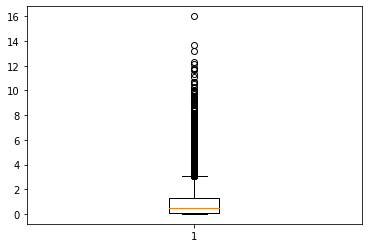

In [17]:
fig, ax = plt.subplots()

ax.boxplot(X_train["0"]);

In [18]:
outliers_col = {}

for col_name in X_train.columns.to_list():
  
  Q1 = X_train[col_name].quantile(0.02)
  Q3 = X_train[col_name].quantile(0.98)
  IQR = Q3 - Q1

  outliers = X_train[(X_train[col_name] < Q1 - 1.5 * IQR) | (X_train[col_name] > Q3 + 1.5 * IQR)].index.to_list()

  outliers_col[col_name] = outliers

In [19]:
outliers_col.values()

dict_values([[3635, 9510], [54, 941, 2684, 2851, 2984, 3096, 3496, 4204, 4617, 5997, 6473, 6950, 7248, 7624, 7949, 8660, 9935], [3093, 8657], [233, 242, 283, 837, 1615, 1683, 4343, 5854, 7242, 7837, 8259, 8384, 8956], [1780, 3272, 6036, 6676], [829, 1430, 1594, 1932, 2346, 6629, 6768], [], [308, 474, 913, 4368, 5666, 5725, 5887, 6328, 8634, 9227], [], [430, 832, 1062, 1497, 1890, 2349, 3528, 4235, 4284, 4540, 8756, 8917, 9211, 9467, 9551, 9698, 9800, 9931], [228, 344, 420, 432, 874, 1242, 1881, 2806, 3789, 4601, 5182, 6638, 6763, 7585, 7781, 8141, 8170, 8207, 9869, 9901], [], [], [1925, 9532], [], [], [1660, 2390, 2414, 2686, 4104, 4320, 4781, 4828, 5107, 7257, 8844, 9474, 9555], [7032], [239, 550, 1295, 4516, 6260, 6985, 7107, 7596], [], [], [], [41, 8429, 9487], [9887], [], [341, 886, 1580, 2125, 2380, 4233, 6162, 6931, 7708, 8159, 9296], [3750, 4717, 7676], [], [2566, 4049, 4648], [6959], [], [], [1017, 4729], [936, 1647, 1949, 2651, 3139, 4343, 4492, 4950, 6454, 6731, 6937, 6955, 7

In [20]:
outliers_list = []

for values_dict in outliers_col.values():
  for value in values_dict:
    outliers_list.append(value)

In [21]:
outliers_list = list(set(outliers_list))
len(outliers_list)

531

## Model data prep

In [22]:
# Split data in training and test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_train.shape)
print("y_train shape:", X_train.shape)
print("y_test shape:", X_train.shape)

X_train shape: (8000, 120)
X_test shape: (8000, 120)
y_train shape: (8000, 120)
y_test shape: (8000, 120)


In [23]:
# Pipelines for data preparation
numeric_features = X_train
numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])

preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ])

In [30]:
# Model pipeline
pipeline = Pipeline(steps=[
                            ("pre_process", preprocessor), 
                            ("model", model)
                            ])

NameError: ignored

In [24]:
# Classification models to test
lr = LogisticRegression(random_state=42, solver='liblinear')
knn = KNeighborsClassifier()
nb = BernoulliNB()
svc = LinearSVC(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Support objects
models = {"LogisticRegression": lr,
          "KNNeighbors": knn,
          "BernoulliNB": nb,
          "LinearSVC": svc,
          "DecisionTree": dtree,
          "RandomForest": rf,
          "AdaBoost": ada_boost,
          "GradientBoosting": gbm,
          "XGB": xgb,
          }

NameError: ignored

In [ ]:
# Scoring - f1_macro
# metrics.f1_score(y_test, y_pred, average="macro")

# Low Code ML

In [26]:
# Initialize set up
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Expected', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='data_challenge_1')

ModuleNotFoundError: ignored

In [ ]:
# Baseline performance
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5121,0.7103,0.5114,0.5221,0.5110,0.2672,0.2708,4.958
gbc,Gradient Boosting Classifier,0.4934,0.6879,0.4928,0.5005,0.4922,0.2392,0.2417,45.798
rf,Random Forest Classifier,0.4818,0.6693,0.4811,0.4890,0.4799,0.2217,0.2245,3.970
et,Extra Trees Classifier,0.4562,0.6422,0.4557,0.4643,0.4564,0.1834,0.1851,1.562
ridge,Ridge Classifier,0.4513,0.0000,0.4508,0.4570,0.4502,0.1761,0.1778,0.054
lda,Linear Discriminant Analysis,0.4502,0.6364,0.4496,0.4571,0.4489,0.1743,0.1764,0.202
lr,Logistic Regression,0.4492,0.6365,0.4486,0.4565,0.4477,0.1728,0.1750,4.442
ada,Ada Boost Classifier,0.4459,0.6345,0.4452,0.4510,0.4436,0.1679,0.1699,3.148
qda,Quadratic Discriminant Analysis,0.4395,0.6267,0.4393,0.4460,0.4363,0.1588,0.1615,0.148
dt,Decision Tree Classifier,0.4172,0.5708,0.4161,0.4201,0.4114,0.1244,0.1269,0.662


# Box Cox transform

Lambda value used for Transformation: 0.20648321813076725


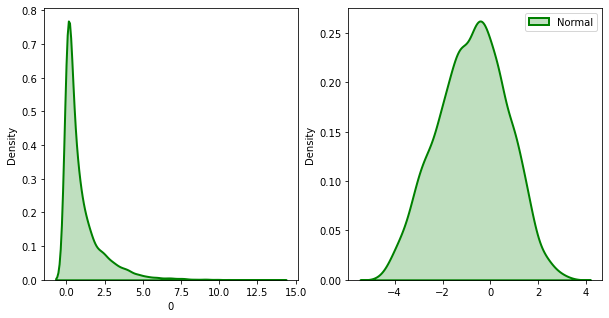

In [21]:
# import modules
import numpy as np
from scipy import stats
  
import seaborn as sns
import matplotlib.pyplot as plt
  
original_data = X_train["0"]
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [22]:
# Applying box cox transformation to all the columns
for col in X_train.columns.to_list():

  if min(X_train[col]) > 0:

    original_data = X_train[col]
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    X_train[col] = fitted_data

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
3463,0.611696,-0.692138,2.295713,-0.147033,2.200063,1.011032,17.521944,0.367706,-3.414019,-0.414690,-0.900894,-3.644446,10.455200,-0.485531,3.836340,8.332007,0.753316,0.734836,0.312448,0.553945,5.875318,-0.251752,0.103140,-1.700926,-1.429875,0.684331,0.260897,-1.190527,-2.762555,-0.344589,-3.172993,-0.050313,2.061723,0.707114,2.660239,-0.878031,2.065421,2.892404,-1.872442,-0.661398,...,-1.114532,-1.336038,0.979042,-0.604252,21.247676,12.974337,-1.822170,3.712788,0.801412,-1.992565,-0.662845,-0.280422,-2.103213,-19.461954,-1.151016,-1.162236,0.773970,-0.564663,-1.599402,-0.275902,0.445360,1.261356,1.485936,0.078299,-2.702254,6.221378,-0.554343,-6.069892,0.501211,-2.021886,0.989590,-0.076204,-0.475298,0.807504,0.455826,-0.396109,2.968952,-1.551605,-0.627795,-0.983425
4916,-1.132993,-2.052980,7.013059,-0.550381,-2.926097,-0.775017,61.573217,-0.124163,23.248907,-0.101114,-0.229439,-2.630434,3.672033,-0.313388,-3.865876,3.578513,-0.260094,-1.698752,-0.463834,-1.446713,1.197909,-0.330993,-0.748913,1.032596,1.056506,-0.216848,0.116766,-0.110657,1.744701,-2.412230,-7.035615,1.156780,1.332963,1.137050,-1.516402,0.771971,10.682517,0.104803,-0.127014,-0.207238,...,-0.295209,0.817727,0.169832,1.374995,-20.605164,8.669069,-4.630779,-0.565668,-0.839810,2.061728,-1.148362,2.598991,-2.919402,-13.277025,-1.261510,1.327598,-0.927529,-0.302042,3.826577,-0.623379,-2.702310,-3.324862,-0.128182,-0.062621,-2.402928,12.614703,-0.605422,-5.203286,-1.125440,-0.728192,1.108084,-1.283139,-0.193427,-0.153142,2.394115,3.607291,7.887763,-1.071264,-0.161793,-1.046875
282,1.063932,0.496632,-1.462263,1.271499,-0.496768,-1.587048,14.571799,-1.045220,20.527646,0.273984,0.596167,6.020658,18.435683,1.783245,-4.397796,4.744341,-0.532990,-0.462120,0.605292,1.201698,6.051052,-0.843542,-0.000881,-0.363700,-5.826119,-0.590543,1.492479,-0.214580,0.256839,-1.140862,6.609734,-1.714133,-1.405230,0.219111,0.996969,1.569526,2.089757,6.130179,0.391761,-0.805879,...,-1.111303,1.950932,-0.657182,-0.502269,4.751099,-1.060493,-2.067061,-0.324411,-1.035550,-0.435506,0.302710,2.257981,-1.144999,-9.252696,-0.587491,-4.206280,-0.304960,-0.216954,5.210764,-0.122541,-0.177307,2.299896,-1.817145,0.606858,0.723013,9.921652,-0.300750,-23.918171,1.617312,1.723186,-0.943591,-0.479060,-1.118254,0.979094,0.773981,-0.821939,-7.540619,-1.270477,-0.575416,0.045245
2669,-2.146927,-0.696629,3.062204,0.141389,1.045484,-0.789181,38.494673,-1.022904,3.768193,0.064740,-0.425627,4.466303,-3.804809,-0.422901,0.768832,-17.938295,0.920965,0.262585,-1.115821,-1.650119,1.137291,-1.123542,-1.216075,-1.981597,4.529836,1.808503,-2.328250,-0.354712,-0.325776,-2.342510,-1.077985,-0.591967,0.147321,1.378848,2.383641,0.079180,-4.051782,-2.256955,-1.162192,0.297725,...,-0.216716,-0.806616,-0.629051,-0.995622,10.998841,-10.916536,-8.851626,0.313749,-0.740612,-0.764923,1.254876,-1.100832,1.598399,-6.299751,-0.053544,1.653913,-0.474543,0.935138,1.806941,-0.194203,2.453419,0.523670,-0.749296,-0.139612,0.474068,3.263911,0.720538,-3.919200,1.447225,0.217308,-0.341614,-0.000796,-0.689837,0.101644,2.541116,9.636472,-19.364492,1.494736,-1.000234,1.131114
6787,-1.134355,-1.055306,2.125839,-0.060398,-3.028295,0.824630,12.720441,-0.525692,-10.924060,0.853805,0.835330,3.792336,-6.888202,-1.521191,-11.824715,12.085892,0.774703,0.377120,0.608956,-1.125976,-3.348035,-0.945737,-1.505102,-1.864873,2.887362,-1.078302,-1.895593,-0.774575,0.684244,-2.736398,6.073515,-0.017868,2.647557,1.282387,0.395199,-3.844192,-0.635367,5.070570,0.353935,-1.361538,...,-0.826749,0.485203,-1.034772,0.520428,6.002016,14.654280,-1.643913,3.615491,1.403511,-0.294430,-0.490832,0.373691,0.281333,2.067618,-0.978300,-3.032268,-1.126294,-0.517355,0.923540,0.547418,-1.141009,-1.417579,0.043238,2.964800,0.015731

### AutoML

In [23]:
from pycaret.classification import *
reg = setup(data=pd.concat([X_train, y_train], axis=1), 
            target = 'Expected', 
            session_id=13, 
            log_experiment=True, 
            experiment_name='data_challenge_2')

,Description,Value
0,session_id,13
1,Target,Expected
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(8000, 121)"
5,Missing Values,False
6,Numeric Features,120
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
# Baseline models after box cox transformation
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5653,0.7513,0.5656,0.5655,0.5649,0.3480,0.3482,5.534
gbc,Gradient Boosting Classifier,0.5378,0.7239,0.5381,0.5379,0.5368,0.3068,0.3074,43.746
qda,Quadratic Discriminant Analysis,0.5060,0.6915,0.5061,0.5068,0.5058,0.2589,0.2592,0.124
rf,Random Forest Classifier,0.4994,0.6933,0.4996,0.5001,0.4991,0.2491,0.2494,3.670
et,Extra Trees Classifier,0.4794,0.6675,0.4797,0.4792,0.4787,0.2191,0.2194,1.422
ridge,Ridge Classifier,0.4703,0.0000,0.4707,0.4693,0.4689,0.2056,0.2060,0.052
lr,Logistic Regression,0.4701,0.6598,0.4704,0.4694,0.4694,0.2052,0.2054,1.466
nb,Naive Bayes,0.4697,0.6641,0.4701,0.4690,0.4689,0.2047,0.2050,0.060
lda,Linear Discriminant Analysis,0.4697,0.6598,0.4700,0.4690,0.4689,0.2047,0.2049,0.174
ada,Ada Boost Classifier,0.4651,0.6558,0.4654,0.4645,0.4643,0.1978,0.1980,3.006


# Tune the fitst 3 models

In [25]:
rf = create_model("rf")
#lightgbm = create_model("lightgbm")
#gbc = create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5571,0.7246,0.5573,0.5597,0.5566,0.3357,0.3368
1,0.4893,0.6804,0.4897,0.4881,0.4875,0.2340,0.2346
2,0.5036,0.6942,0.5037,0.5046,0.5037,0.2554,0.2556
3,0.4857,0.6810,0.4859,0.4846,0.4846,0.2286,0.2289
4,0.5089,0.7004,0.5090,0.5090,0.5089,0.2634,0.2634
5,0.5143,0.7128,0.5145,0.5159,0.5133,0.2716,0.2725
6,0.5304,0.7184,0.5309,0.5320,0.5306,0.2955,0.2958
7,0.5000,0.6924,0.5004,0.5002,0.5000,0.2499,0.2500
8,0.4982,0.6589,0.4987,0.4983,0.4977,0.2474,0.2477
9,0.5170,0.6942,0.5171,0.5186,0.5169,0.2754,0.2759


In [26]:
tuned_rf = tune_model(rf, n_iter=50, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5661,0.7623,0.5658,0.5669,0.5653,0.3488,0.3496
1,0.5857,0.7559,0.5856,0.5915,0.5859,0.3783,0.3800
2,0.5554,0.7497,0.5554,0.5606,0.5550,0.3330,0.3349
3,0.5857,0.7488,0.5856,0.5881,0.5860,0.3784,0.3790
4,0.5589,0.7574,0.5590,0.5589,0.5586,0.3384,0.3386
5,0.5661,0.7487,0.5661,0.5681,0.5665,0.3490,0.3494
6,0.5518,0.7557,0.5518,0.5559,0.5524,0.3274,0.3282
7,0.5571,0.7467,0.5575,0.5580,0.5575,0.3356,0.3356
8,0.5589,0.7360,0.5593,0.5580,0.5582,0.3384,0.3386
9,0.5510,0.7400,0.5510,0.5531,0.5516,0.3264,0.3266


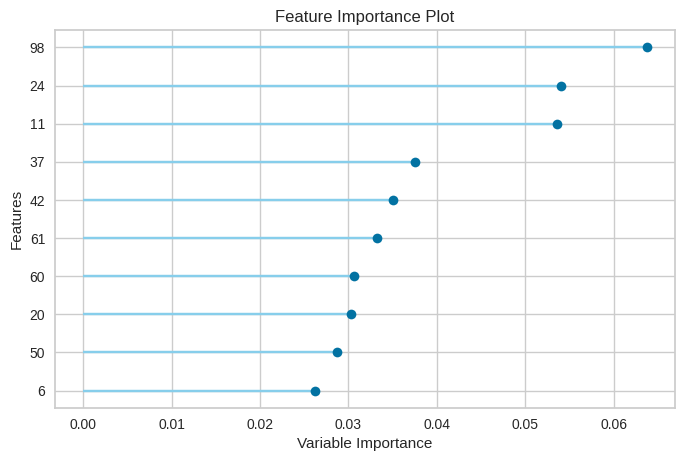

In [32]:
plot_model(tuned_rf, plot = 'feature') # check importance of features

In [1]:
interpret_model(tuned_rf, plot='msa') 

NameError: ignored

In [ ]:
# tuned_rf = tune_model(rf, n_iter=50, optimize = 'f1', max_time_min = 10)

In [ ]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'f1')

In [ ]:
#tuned_gbc = tune_model(gbc, n_iter=50, optimize = 'f1')

# Putting a Model from previous part to the training data

In [27]:
tuned_rf 

# print out to get parameters from the tuned_rf. These parameters represent combination of the best model 
# put these parameters to the model below and run the model 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)


numeric_features = X_train.columns.to_list()
numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ])
# Model pipeline
pipeline = Pipeline(steps=[
                            ("pre_process", preprocessor), 
                            ("model", model)
                            ])
pipeline.fit(X_train, y_train)   # fitting the model from previous section to the training data 

y_pred = pipeline.predict(X_train)  # predictions values from training data (X_train input)

score = f1_score(y_train, y_pred, average="macro")
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


ValueError: ignored